<a href="https://colab.research.google.com/github/Aboelsaood23/Aboelsaood23/blob/main/Evaluation_and_Diagnostic_of_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Model Evaluation :**


* Model evaluation is the broader process of assessing the overall performance of a model on a given task or set of tasks.
*  It involves using standard metrics to quantify the model's performance, such as accuracy, precision, recall, F1 score, or area under the receiver operating characteristic curve (AUC-ROC).
* Evaluation is often performed using a test set or validation set that was not seen by the model during training. Standard evaluation metrics provide a high-level overview of how well the model is performing on average.


##**Linear and Polynomial Regression evlauation using scikit learn metrics**


###**Standardization :**

* This is a common preprocessing step in machine learning pipelines, especially when working with algorithms that are sensitive to the scale of the input features, such as support vector machines or k-nearest neighbors and Linear Regession

* it's removing value of maen by setting it to 0 and set std = 1

###**Adding polynomial features :**
* creating new features by raising the existing features to higher powers. This process allows linear regression models to capture more complex relationships between the input features and the target variable.
it's removing value of maen by setting it to 0 and set std = 1

* on adding polynomial, fitting and transforming the training data ensures that the model learns the appropriate transformation parameters, while only transforming the validation or test data helps evaluate the model's performance on new, unseen samples without introducing data leakage

###**Choosing the best model :**



*   you want to choose one that performs well both on the training and cross validation set. It implies that it is able to learn the patterns from your training set without overfitting
* actaully test set value of mse is the one that represent the model,you have to do same transformation on test set as training set



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


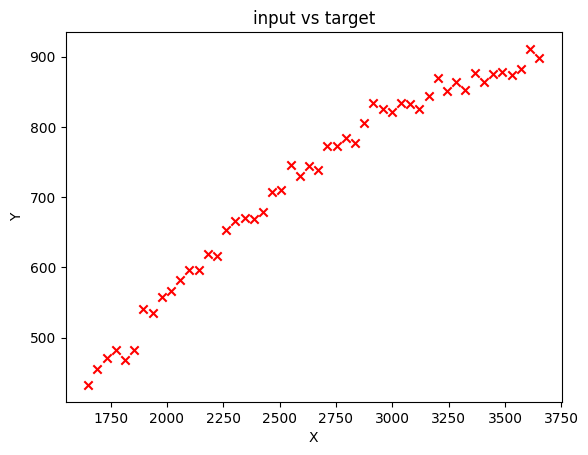

shape of training set input is (30, 1)
shape of training set (target) is (30, 1)

shape of cross validation input is (10, 1)
shape of cross validation (target) is (10, 1)
shape of test set (input) is : (10, 1)
shape on test set (target) is (10, 1)


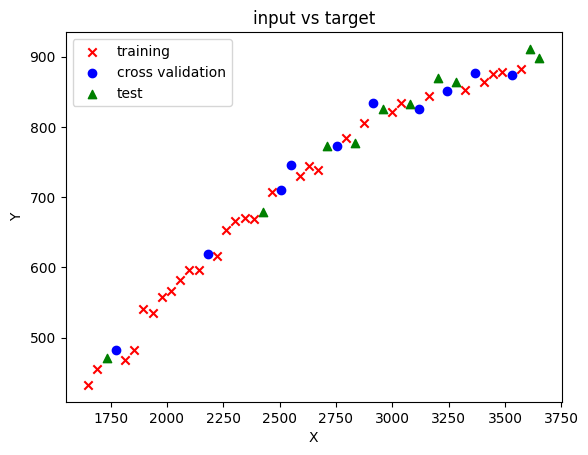


Training Data after scaling


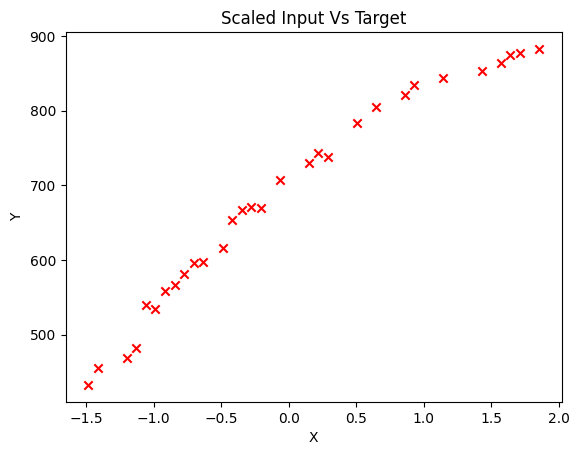

training MSE (use sklearn function):406.19374192533155
Cross Validation MSE: 551.7789026952216

Model preformance on training data 


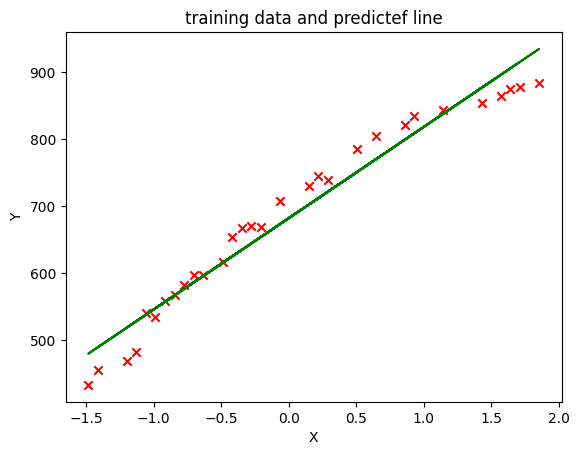

In [47]:
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/data_w3_ex1.csv",delimiter=',')

x =data[:,0] #on shape (50,)
y =data[:,1] #on shape (50,)

x =np.expand_dims(x,axis =1) # to make it 2D with shape (50,1)
y =np.expand_dims(y,axis=1)  # to make it 2D with shape (50,1)

#plot this data
plt.scatter(x,y,marker='x',c='r')
plt.title("input vs target")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#split data into training data and test data
x_train,x_,y_train,y_ =train_test_split(x,y,test_size=0.40,random_state=1)
x_cv,x_test,y_cv,y_test =train_test_split(x_,y_,test_size=0.50,random_state=1)
del x_,y_

print(f"shape of training set input is {x_train.shape}")
print(f"shape of training set (target) is {y_train.shape}\n")
print(f"shape of cross validation input is {x_cv.shape}")
print(f"shape of cross validation (target) is {y_cv.shape}")
print(f"shape of test set (input) is : {x_test.shape}")
print(f"shape on test set (target) is {y_test.shape}")

#plot data after splitting
plt.scatter(x_train,y_train,marker='x',c='r',label='training')
plt.scatter(x_cv,y_cv,marker='o',c='b',label='cross validation')
plt.scatter(x_test,y_test,marker='^',c='g',label='test')
plt.title("input vs target")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

scaler_linear =StandardScaler()
x_train_scaled =scaler_linear.fit_transform(x_train)
#check it by plotting data
print("\nTraining Data after scaling")
plt.scatter(x_train_scaled,y_train,marker='x',c ='r')
plt.title("Scaled Input Vs Target")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#linear model
linear_model =LinearRegression()
linear_model.fit(x_train_scaled,y_train)

#evaluate model use MSE built in function
yhat =linear_model.predict(x_train_scaled) # we will use this on measurin error
# we used only 2 not 2*m becaus mean means it's divided laready by number of examples(m) and this 2 is just for drevative
print(f"training MSE (use sklearn function):{mean_squared_error(y_train,yhat)/2}")

#'s important to apply the same scaling transformation to your validation set and test set.
#This ensures that your data remains on a consistent scale across all sets, and the model is trained and evaluated on comparable input.
x_cv_scaled=scaler_linear.transform(x_cv)
yhat_cv =linear_model.predict(x_cv_scaled)
print(f"Cross Validation MSE: {mean_squared_error(y_cv,yhat_cv)/2}")

#check model preformance by plotting data
print("\nModel preformance on training data ")
plt.scatter(x_train_scaled,y_train,marker='x',c ='r')
plt.plot(x_train_scaled,yhat,c='g')
plt.title("training data and predictef line")

plt.xlabel("X")
plt.ylabel("Y")
plt.show()



[[ 1.42715997  1.47236856]
 [-0.27691164 -0.36461881]
 [ 1.71117191  1.84025141]
 [ 0.22010925  0.1055935 ]
 [ 0.14910627  0.03511397]]
shape of scalled original data :(30, 1)
shape of mapped scaled data :(30, 2)
Training mapped MSE :49.111609334025154
Cross validation mapped MSE : 87.6984121111191


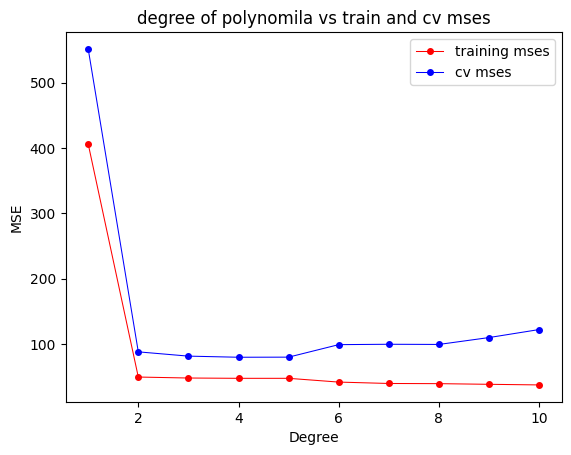

Lowest CV MSE is found = 4 
values of mse of training dataset on degree 4 is : 47.146466442636395
 cross validation error when degree is 4 : 79.43134912070502
 test set mse when degree is 4 = 104.6316820528975


In [48]:
# adding polynomial features
poly =PolynomialFeatures(degree =2,include_bias =False)
x_train_mapped =poly.fit_transform(x_train) # add polynomial feaures to original data then apply features scaling
scaler_poly =StandardScaler()
x_train_mapped_scaled =scaler_poly.fit_transform(x_train_mapped)
print(x_train_mapped_scaled[:5]) # first five elements of mapped data
print(f"shape of scalled original data :{x_train_scaled.shape}")
print(f"shape of mapped scaled data :{x_train_mapped_scaled.shape}") # it's two degree what it meas 2 features

#let's build model
model =LinearRegression()
model.fit(x_train_mapped_scaled,y_train)
yhat =model.predict(x_train_mapped_scaled)
print(f"Training mapped MSE :{mean_squared_error(y_train,yhat)/2}")

#  do the same for validation data
x_cv_mapped =poly.transform(x_cv)
x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped) #apply same process on cross validation data, notice it's only transform not fit_transform
yhat_cv =model.predict(x_cv_mapped_scaled)
print(f"Cross validation mapped MSE : {mean_squared_error(y_cv,yhat_cv)/2}")

# to know which polynomial degree is better, try many values and save value of mse for training data and cross validation
train_mses =[] # to save mse train value
cv_mses =[]
models =[]
scalers =[]

for degree in range(1,11):
  #add polynomial featrues and scale the training set
  poly =PolynomialFeatures(degree,include_bias=False)
  x_train_mapped =poly.fit_transform(x_train)
  scaler_poly =StandardScaler()
  x_train_mapped_scaled =scaler_poly.fit_transform(x_train_mapped)
  scalers.append(scaler_poly)
  #create and train model
  model =LinearRegression()
  model.fit(x_train_mapped_scaled,y_train)
  models.append(model)
  #compute training set MSE
  yhat =model.predict(x_train_mapped_scaled)
  train_mse =mean_squared_error(y_train,yhat)/2
  train_mses.append(train_mse)
  # add polynomial featrues and scale to cross validation set
  poly =PolynomialFeatures(degree,include_bias =False)
  x_cv_mapped =poly.fit_transform(x_cv)
  x_cv_mapped_scaled =scaler_poly.transform(x_cv_mapped)
  # compute cross validation mse directly using same model
  yhat = model.predict(x_cv_mapped_scaled)
  cv_mse =mean_squared_error(y_cv,yhat)/2
  cv_mses.append(cv_mse)

degree =range(1,11) # to use it on x-axis
plt.plot(degree,train_mses,marker='o',markersize= 4 ,c ='r',label ='training mses',lw =0.75)
plt.plot(degree,cv_mses,marker='o',markersize= 4 ,c='b',label ='cv mses',lw =0.75)
plt.title("degree of polynomila vs train and cv mses")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()
plt.show()


# you can choose lowest degree
degree = np.argmin(cv_mses)+1 # count of list starts from zeros
print(f"Lowest CV MSE is found = {degree} ") # it seems 4th degree

poly =PolynomialFeatures(4,include_bias =False)
x_train_mapped =poly.fit_transform(x_train)
scaler =StandardScaler()
x_train_mapped_scaled =scaler.fit_transform(x_train_mapped)
model =LinearRegression()
model.fit(x_train_mapped_scaled,y_train)
yhat_1 =model.predict(x_train_mapped_scaled)
train_mse =mean_squared_error(y_train,yhat_1)/2
print(f"values of mse of training dataset on degree 4 is : {train_mse}")

#do same on cross validation dataset
x_cv_mapped =poly.fit_transform(x_cv)
x_cv_mapped_scaled =scaler.transform(x_cv_mapped)
yhat_2 =model.predict(x_cv_mapped_scaled)
cross_validation_mse =mean_squared_error(y_cv,yhat_2)/2
print(f" cross validation error when degree is 4 : {cross_validation_mse}")

# let's apply same transformation on test set
x_test_mapped =poly.fit_transform(x_test)
x_test_mapped_scaled =scaler.transform(x_test_mapped)
yhat_3 =model.predict(x_test_mapped_scaled)
test_set_mse =mean_squared_error(y_test,yhat_3)/2
print(f" test set mse when degree is 4 = {test_set_mse}") #notice : this mse value is bigger than training set and cross validation



##**Neural Network and it's Evaluation :**
* neural networks can learn non-linear relationships so you can opt to skip adding polynomial features


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense ,Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

#add polynomial feaures to train,cross validationa and test set
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
x_train_mapped = poly.fit_transform(x_train)
x_cv_mapped = poly.transform(x_cv)
x_test_mapped = poly.transform(x_test)

# scalling features for on tain, cross validation and test data
scaler =StandardScaler()
x_train_mapped_scaled =scaler.fit_transform(x_train_mapped)
x_cv_mapped_scaled =scaler.transform(x_cv_mapped)
x_test_mapped_scaled =scaler.transform(x_test_mapped)

#create three models of neural networks
tf.random.set_seed(1234)
model_1 =Sequential([
    Dense(25,activation ='relu'),
    Dense(15,activation ='relu'),
    Dense(1,activation  ='linear')
])
model_2 =Sequential([
    Dense(20,activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(20,activation ='relu'),
    Dense(1,activation  ='linear')
],name ='model_2')
model_3 =Sequential([
    Dense(32,activation ='relu'),
    Dense(16,activation ='relu'),
    Dense(8 ,activation ='relu'),
    Dense(4, activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(1 ,activation ='linear')
],name ='model_3')

model_list =[model_1,model_2,model_3]
#list to save values of mse for each model
nn_train_mses =[]
nn_cv_mses =[]
nn_models=[]

nn_models =model_list

for model in nn_models :
  model.compile(
      loss ='mse',
      optimizer =tf.keras.optimizers.Adam(learning_rate =0.2)
  )
  print(f"training model {model.name}...")
  model.fit(
      x_train_mapped_scaled,y_train,
      epochs =300,
      verbose =0

  )
  print("Done\n")
  #record training mse
  yhat =model.predict(x_train_mapped_scaled)
  train_mse =mean_squared_error(y_train,yhat)/2
  nn_train_mses.append(train_mse)
  #record training mse
  yhat_cv =model.predict(x_cv_mapped_scaled)
  cv_mse =mean_squared_error(y_cv,yhat_cv)/2
  nn_cv_mses.append(cv_mse)

for model_num in range(len(nn_train_mses)):
  print(
      f"modelc{model_num+1}: Training MSE : {nn_train_mses[model_num]:.2f}"+
      f"cv MSE: {nn_cv_mses[model_num]:.2f}"
  )


training model sequential_2...
Done

1/1 [==============================] - 0s 29ms/step
training model model_2...


Done

1/1 [==============================] - 0s 26ms/step
training model model_3...


Done

1/1 [==============================] - 0s 25ms/step
modelc1: Training MSE : 406.19cv MSE: 551.78
modelc2: Training MSE : 73.40cv MSE: 112.30
modelc3: Training MSE : 73.40cv MSE: 112.10


In [54]:
# best model is model 3
model_num =3
yhat =nn_models[model_num-1].predict(x_test_mapped_scaled)
test_mse =mean_squared_error(y_test,yhat)/2
print(f"Selected Model :{model_num}")
print(f"Training mse :{nn_train_mses[model_num-1]:.2f}")
print(f"Cross validation MSE :{nn_cv_mses[model_num-1]:.2f}")
print(f"test MSE :{test_mse:.2f}") #this is general error og mofrl

1/1 [==============================] - 0s 21ms/step
Selected Model :3
Training mse :73.40
Cross validation MSE :112.10
test MSE :131.55


###**Clalssification using Neural Network**

* There are several metrics commonly used to evaluate the performance of classification models,we will use accuracy metric
* we are gonna use the most recommended approach where use a linear activation for the output layer (instead of sigmoid) then set from_logits=True when declaring the loss function of the model
* as it's binary clssification ,Binary Cross-Entropy loss function will be used"it log loss function used on logistic regression using scikit learn"

the shape of inputs is (200, 2)
the shape of outputs is (200, 1)


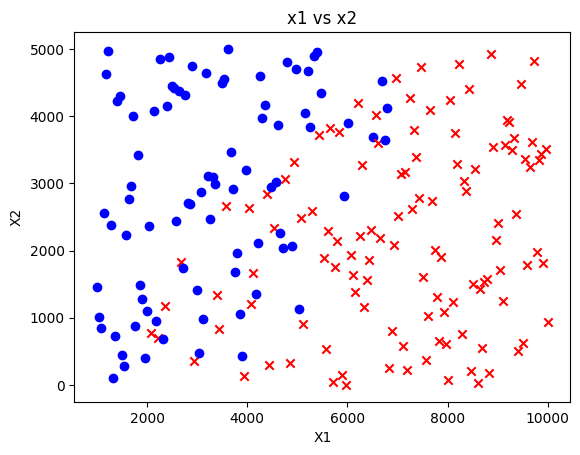

 the shape of trainig set (imput) is : (120, 2)
 the shape of training set (target) is :(120, 1)

 the shape of cross validation set (input) is : (40, 2)
 the shape of cross validation set (target) is (40, 1)

 the shape of test set (input) is :(40, 2)
 the shape of test set (target) is (40, 1)


In [61]:
data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/data_w3_ex2.csv",delimiter =',')
x_bc =data[:,:-1]
y_bc =data[:,-1]
#y_bc is on shape of (200,) we need it on 2D with shape (200,1)
y_bc =np.expand_dims(y_bc,axis=1)

print(f"the shape of inputs is {x_bc.shape}")
print(f"the shape of outputs is {y_bc.shape}") # this new y_bc

for i in range(len(y_bc)):
  marker='x'if y_bc[i]==1 else 'o'
  c ='r' if y_bc[i]==1 else 'b'
  plt.scatter(x_bc[i,0],x_bc[i,1],marker=marker,c=c)
plt.title("x1 vs x2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

#split data to train data and test data
from sklearn.model_selection import train_test_split
x_bc_train,x_,y_bc_train,y_ =train_test_split(x_bc,y_bc,test_size=0.40,random_state=1)
x_bc_cv,x_bc_test,y_bc_cv,y_bc_test =train_test_split(x_,y_,test_size =0.50,random_state =1)
del x_,y_

print(f" the shape of trainig set (imput) is : {x_bc_train.shape}")
print(f" the shape of training set (target) is :{y_bc_train.shape}\n")
print(f" the shape of cross validation set (input) is : {x_bc_cv.shape}")
print(f" the shape of cross validation set (target) is {y_bc_cv.shape}\n")
print(f" the shape of test set (input) is :{x_bc_test.shape}")
print(f" the shape of test set (target) is {y_bc_test.shape}")



In [63]:
# we will use same models model_list
tf.random.set_seed(1234)
model_1 =Sequential([
    Dense(25,activation ='relu'),
    Dense(15,activation ='relu'),
    Dense(1,activation  ='linear')
])
model_2 =Sequential([
    Dense(20,activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(20,activation ='relu'),
    Dense(1,activation  ='linear')
],name ='model_2')
model_3 =Sequential([
    Dense(32,activation ='relu'),
    Dense(16,activation ='relu'),
    Dense(8 ,activation ='relu'),
    Dense(4, activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(1 ,activation ='linear')
],name ='model_3')

model_list =[model_1,model_2,model_3]
models_bc =model_list
nn_train_error =[]
nn_cv_error    =[]

#fit models
for model in models_bc :
  model.compile(
      loss =tf.keras.losses.BinaryCrossentropy(from_logits=True),
      optimizer =tf.keras.optimizers.Adam(learning_rate=0.01)
  )
  print(f"training {model.name}...")
  model.fit(
      x_bc_train,y_bc_train,
      epochs=200,
      verbose=0
  )
  print("Done\n")
  threshold =0.5
  # record error of misclassified exampels for training set
  yhat= model.predict(x_bc_train)
  yhat =tf.math.sigmoid(yhat)
  yhat =np.where(yhat>=threshold,1,0)
  train_error =np.mean(yhat != y_bc_train)
  nn_train_error.append(train_error)
  # Record the fraction of misclassified examples for the cross validation set
  yhat = model.predict(x_bc_cv)
  yhat = tf.math.sigmoid(yhat)
  yhat = np.where(yhat >= threshold, 1, 0)
  cv_error = np.mean(yhat != y_bc_cv)
  nn_cv_error.append(cv_error)

for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )



training sequential_3...
Done

2/2 [==============================] - 0s 7ms/step
training model_2...
Done

2/2 [==============================] - 0s 8ms/step
training model_3...
Done

2/2 [==============================] - 0s 6ms/step
Model 1: Training Set Classification Error: 0.17500, CV Set Classification Error: 0.17500
Model 2: Training Set Classification Error: 0.15000, CV Set Classification Error: 0.07500
Model 3: Training Set Classification Error: 0.20833, CV Set Classification Error: 0.12500


In [66]:
# you can see that model 2 is the best

model_num = 2
threshold =0.5
# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test) # we add -1 as count starts from 0
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 [==============================] - 0s 11ms/step
Selected Model: 2
Training Set Classification Error: 0.1500
CV Set Classification Error: 0.0750
Test Set Classification Error: 0.0750


In [64]:
x =model_list[1]
x.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 20)                60        
                                                                 
 dense_37 (Dense)            (None, 12)                252       
                                                                 
 dense_38 (Dense)            (None, 12)                156       
                                                                 
 dense_39 (Dense)            (None, 20)                260       
                                                                 
 dense_40 (Dense)            (None, 1)                 21        
                                                                 
Total params: 749 (2.93 KB)
Trainable params: 749 (2.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#**Model Diagnostic :**
* Diagnostic analysis is focused on understanding the behavior of a model, identifying its strengths, weaknesses, and areas for improvement.
*  It involves a more in-depth analysis of specific aspects of the model's performance, such as examining misclassifications, understanding feature importance, or identifying patterns in prediction errors.
* Diagnostic is process built on evaluation, actually evaluation is telling you what to do next

##**Biase and Variance :**
Bias and variance are two sources of error in machine learning models. Understanding these concepts helps in diagnosing and addressing issues related to the model's performance.

###**Bias :**


*  Bias refers to the error introduced by approximating a real-world problem,It represents the difference between the predicted values and the true values.
*   high bias problem where the model is not capturing the patterns in the training data. As a result, you will have a high training and cross validation error
*  High bias often leads to underfitting,Models with high bias may overlook relevant features and produce inaccurate predictions across various datasets.
* How to fix it :
    > try adding polynomial features

    >try getting additional features

    >try decreasing the regularization parameter

###**Variance  :**


*  Variance refers to the model's sensitivity to fluctuations or changes in the training data. It represents the variability of the model's predictions when trained on different subsets of the data.
*    high variance problem where the model has overfit the training set. Thus, even though it has a low training error, it will perform poorly on new examples
* model is too sensitive to the training data and captures noise as if it were a real pattern
* How to fix it :
    >try increasing the regularization parameter

    >try smaller sets of features

    >get more training examples

###**The trade-off between bias and variance  :**
*  **High Bias, Low Variance (Underfitting) :** The model is too simple, and it fails to capture the underlying patterns in the data. It performs poorly on both the training and test sets.
* **Low Bias, High Variance (Overfitting) :** The model is too complex, capturing noise in the training data as if it were a real pattern. While it performs well on the training set, it may generalize poorly to new, unseen data
*  **Balancing Bias and Variance :** The goal is to find the right level of model complexity that minimizes both bias and variance, achieving good performance on both the training and test sets. This is often referred to as achieving a good bias-variance trade-off.

training error :969.2487477918578
cross validation error :1712.0560916593943
test set errot : 1366.9313779418553


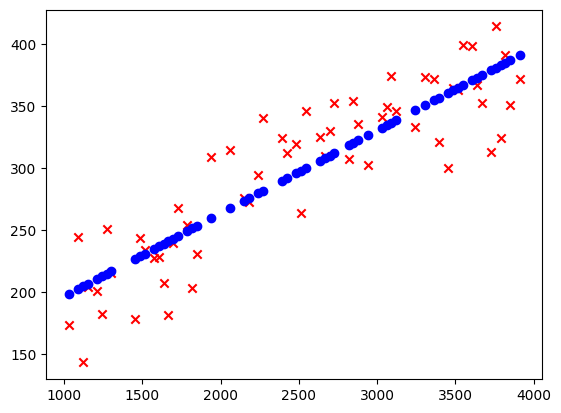

In [75]:
#High biase problem
from sklearn.linear_model import LinearRegression,Ridge # it's L2 Regularized regression model
data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/c2w3_lab2_data1.csv",delimiter=',')
x =data[:,:-1]
y =data[:,-1]
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=80)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.50,random_state=80)

#Instantiat regression model
model=LinearRegression()
#1 let's add polynomial
model.fit(x_train,y_train)
yhat =model.predict(x_train)

plt.scatter(x_train,y_train,marker='x',c ='r')
plt.scatter(x_train,yhat,c='b') # this result of prediction of x_train

print(f"training error :{mean_squared_error(model.predict(x_train),y_train)}")
print(f"cross validation error :{mean_squared_error(model.predict(x_cv),y_cv)}")
print(f"test set errot : {mean_squared_error(model.predict(x_test),y_test)}")


#### **Try adding polynomial features with many degress**

In [68]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_cv.shape,y_cv.shape

((60, 1), (60,), (20, 1), (20,), (20, 1), (20,))

In [69]:
x_train[0:3],y_train[0:3]

(array([[3757.57575758],
        [2878.78787879],
        [3545.45454545]]),
 array([414.05124428, 335.23243533, 399.21628966]))